In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
import seaborn as sns

In [295]:
train= pd.read_csv('blackFriday_train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [296]:
train.shape

(550068, 12)

In [297]:
test= pd.read_csv('blackFriday_test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [298]:
test.shape

(233599, 11)

In [299]:
#merging both the train and test dataset

df= train.append(test, sort=False)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [300]:
df.shape

(783667, 12)

In [301]:
df= df.drop('User_ID', axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [303]:
#Converting categorical column to numerical 
df= pd.get_dummies(df, columns=['Gender'])
df.head()

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,P00069042,0-17,10,A,2,0,3,NaN,NaN,8370.0,1,0
1,P00248942,0-17,10,A,2,0,1,6.0,14.0,15200.0,1,0
2,P00087842,0-17,10,A,2,0,12,NaN,NaN,1422.0,1,0
3,P00085442,0-17,10,A,2,0,12,14.0,NaN,1057.0,1,0
4,P00285442,55+,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  Gender_F                    783667 non-null  uint8  
 11  Gender_M                    783667 non-null  uint8  
dtypes: float64(3), int64(3), object(4), uint8(2)
memory usage: 67.3+ MB


In [305]:
df['Age'].nunique()

7

In [306]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [307]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [308]:
df.head()

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,P00069042,1,10,A,2,0,3,NaN,NaN,8370.0,1,0
1,P00248942,1,10,A,2,0,1,6.0,14.0,15200.0,1,0
2,P00087842,1,10,A,2,0,12,NaN,NaN,1422.0,1,0
3,P00085442,1,10,A,2,0,12,14.0,NaN,1057.0,1,0
4,P00285442,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [309]:
df[df['Age']==7]

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
4,P00285442,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
159,P00117442,7,7,C,2,0,5,14.0,NaN,8596.0,0,1
160,P00322042,7,7,C,2,0,5,8.0,NaN,5248.0,0,1
161,P00216342,7,7,C,2,0,3,4.0,5.0,10592.0,0,1
162,P00329342,7,7,C,2,0,5,NaN,NaN,3482.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233536,P00051442,7,3,C,3,0,8,17.0,NaN,NaN,0,1
233541,P00083742,7,13,B,0,0,2,17.0,NaN,NaN,0,1
233542,P00088442,7,13,B,0,0,8,NaN,NaN,NaN,0,1
233560,P00085342,7,1,C,3,0,10,13.0,NaN,NaN,0,1


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  Gender_F                    783667 non-null  uint8  
 11  Gender_M                    783667 non-null  uint8  
dtypes: float64(3), int64(4), object(3), uint8(2)
memory usage: 67.3+ MB


In [311]:
#Converting the City_Category from categorical to numerical
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [312]:
df[df['City_Category']== 'A']

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M
0,P00069042,1,10,A,2,0,3,NaN,NaN,8370.0,1,0
1,P00248942,1,10,A,2,0,1,6.0,14.0,15200.0,1,0
2,P00087842,1,10,A,2,0,12,NaN,NaN,1422.0,1,0
3,P00085442,1,10,A,2,0,12,14.0,NaN,1057.0,1,0
5,P00193542,3,15,A,3,0,1,2.0,NaN,15227.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233547,P00201442,3,7,A,1,0,1,6.0,8.0,NaN,1,0
233552,P00157142,5,0,A,3,0,11,16.0,NaN,NaN,1,0
233571,P00124642,3,7,A,0,1,16,NaN,NaN,NaN,1,0
233587,P00162442,2,4,A,4+,0,1,16.0,NaN,NaN,0,1


In [313]:
df= pd.get_dummies(df, columns=['City_Category'])
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,P00069042,1,10,2,0,3,NaN,NaN,8370.0,1,0,1,0,0
1,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,P00087842,1,10,2,0,12,NaN,NaN,1422.0,1,0,1,0,0
3,P00085442,1,10,2,0,12,14.0,NaN,1057.0,1,0,1,0,0
4,P00285442,7,16,4+,0,8,NaN,NaN,7969.0,0,1,0,0,1


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   Gender_F                    783667 non-null  uint8  
 10  Gender_M                    783667 non-null  uint8  
 11  City_Category_A             783667 non-null  uint8  
 12  City_Category_B             783667 non-null  uint8  
 13  City_Category_

In [315]:
df.isnull().sum()

Product_ID                         0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Gender_F                           0
Gender_M                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [316]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [317]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [318]:
df.rename(columns={'Product_Category_1': 'Cat1', 'Product_Category_2':'Cat2', 'Product_Category_3': 'Cat3'}, inplace=True)

In [319]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,P00069042,1,10,2,0,3,NaN,NaN,8370.0,1,0,1,0,0
1,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,P00087842,1,10,2,0,12,NaN,NaN,1422.0,1,0,1,0,0
3,P00085442,1,10,2,0,12,14.0,NaN,1057.0,1,0,1,0,0
4,P00285442,7,16,4+,0,8,NaN,NaN,7969.0,0,1,0,0,1


In [320]:
df['Cat3'] = df['Cat3'].fillna(df['Cat3'].mode()[0])
df['Cat2'] = df['Cat2'].fillna(df['Cat2'].mode()[0])

In [321]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,P00069042,1,10,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,P00087842,1,10,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,P00085442,1,10,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,P00285442,7,16,4+,0,8,8.0,16.0,7969.0,0,1,0,0,1


In [322]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mean())

In [323]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,P00069042,1,10,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,P00087842,1,10,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,P00085442,1,10,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,P00285442,7,16,4+,0,8,8.0,16.0,7969.0,0,1,0,0,1


In [324]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [325]:
df["Stay_In_Current_City_Years"]= df["Stay_In_Current_City_Years"].str.replace('+', '')

In [326]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,P00069042,1,10,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,P00087842,1,10,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,P00085442,1,10,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,P00285442,7,16,4,0,8,8.0,16.0,7969.0,0,1,0,0,1


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Cat1                        783667 non-null  int64  
 6   Cat2                        783667 non-null  float64
 7   Cat3                        783667 non-null  float64
 8   Purchase                    783667 non-null  float64
 9   Gender_F                    783667 non-null  uint8  
 10  Gender_M                    783667 non-null  uint8  
 11  City_Category_A             783667 non-null  uint8  
 12  City_Category_B             783667 non-null  uint8  
 13  City_Category_

In [340]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,P00069042,1,10,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,P00087842,1,10,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,P00085442,1,10,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,P00285442,7,16,4,0,8,8.0,16.0,7969.0,0,1,0,0,1


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

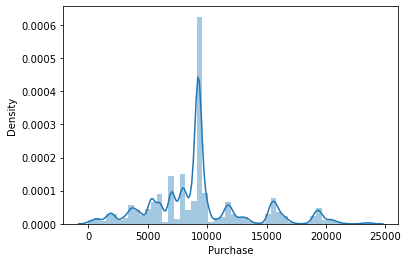

In [328]:
sns.distplot(df['Purchase'])

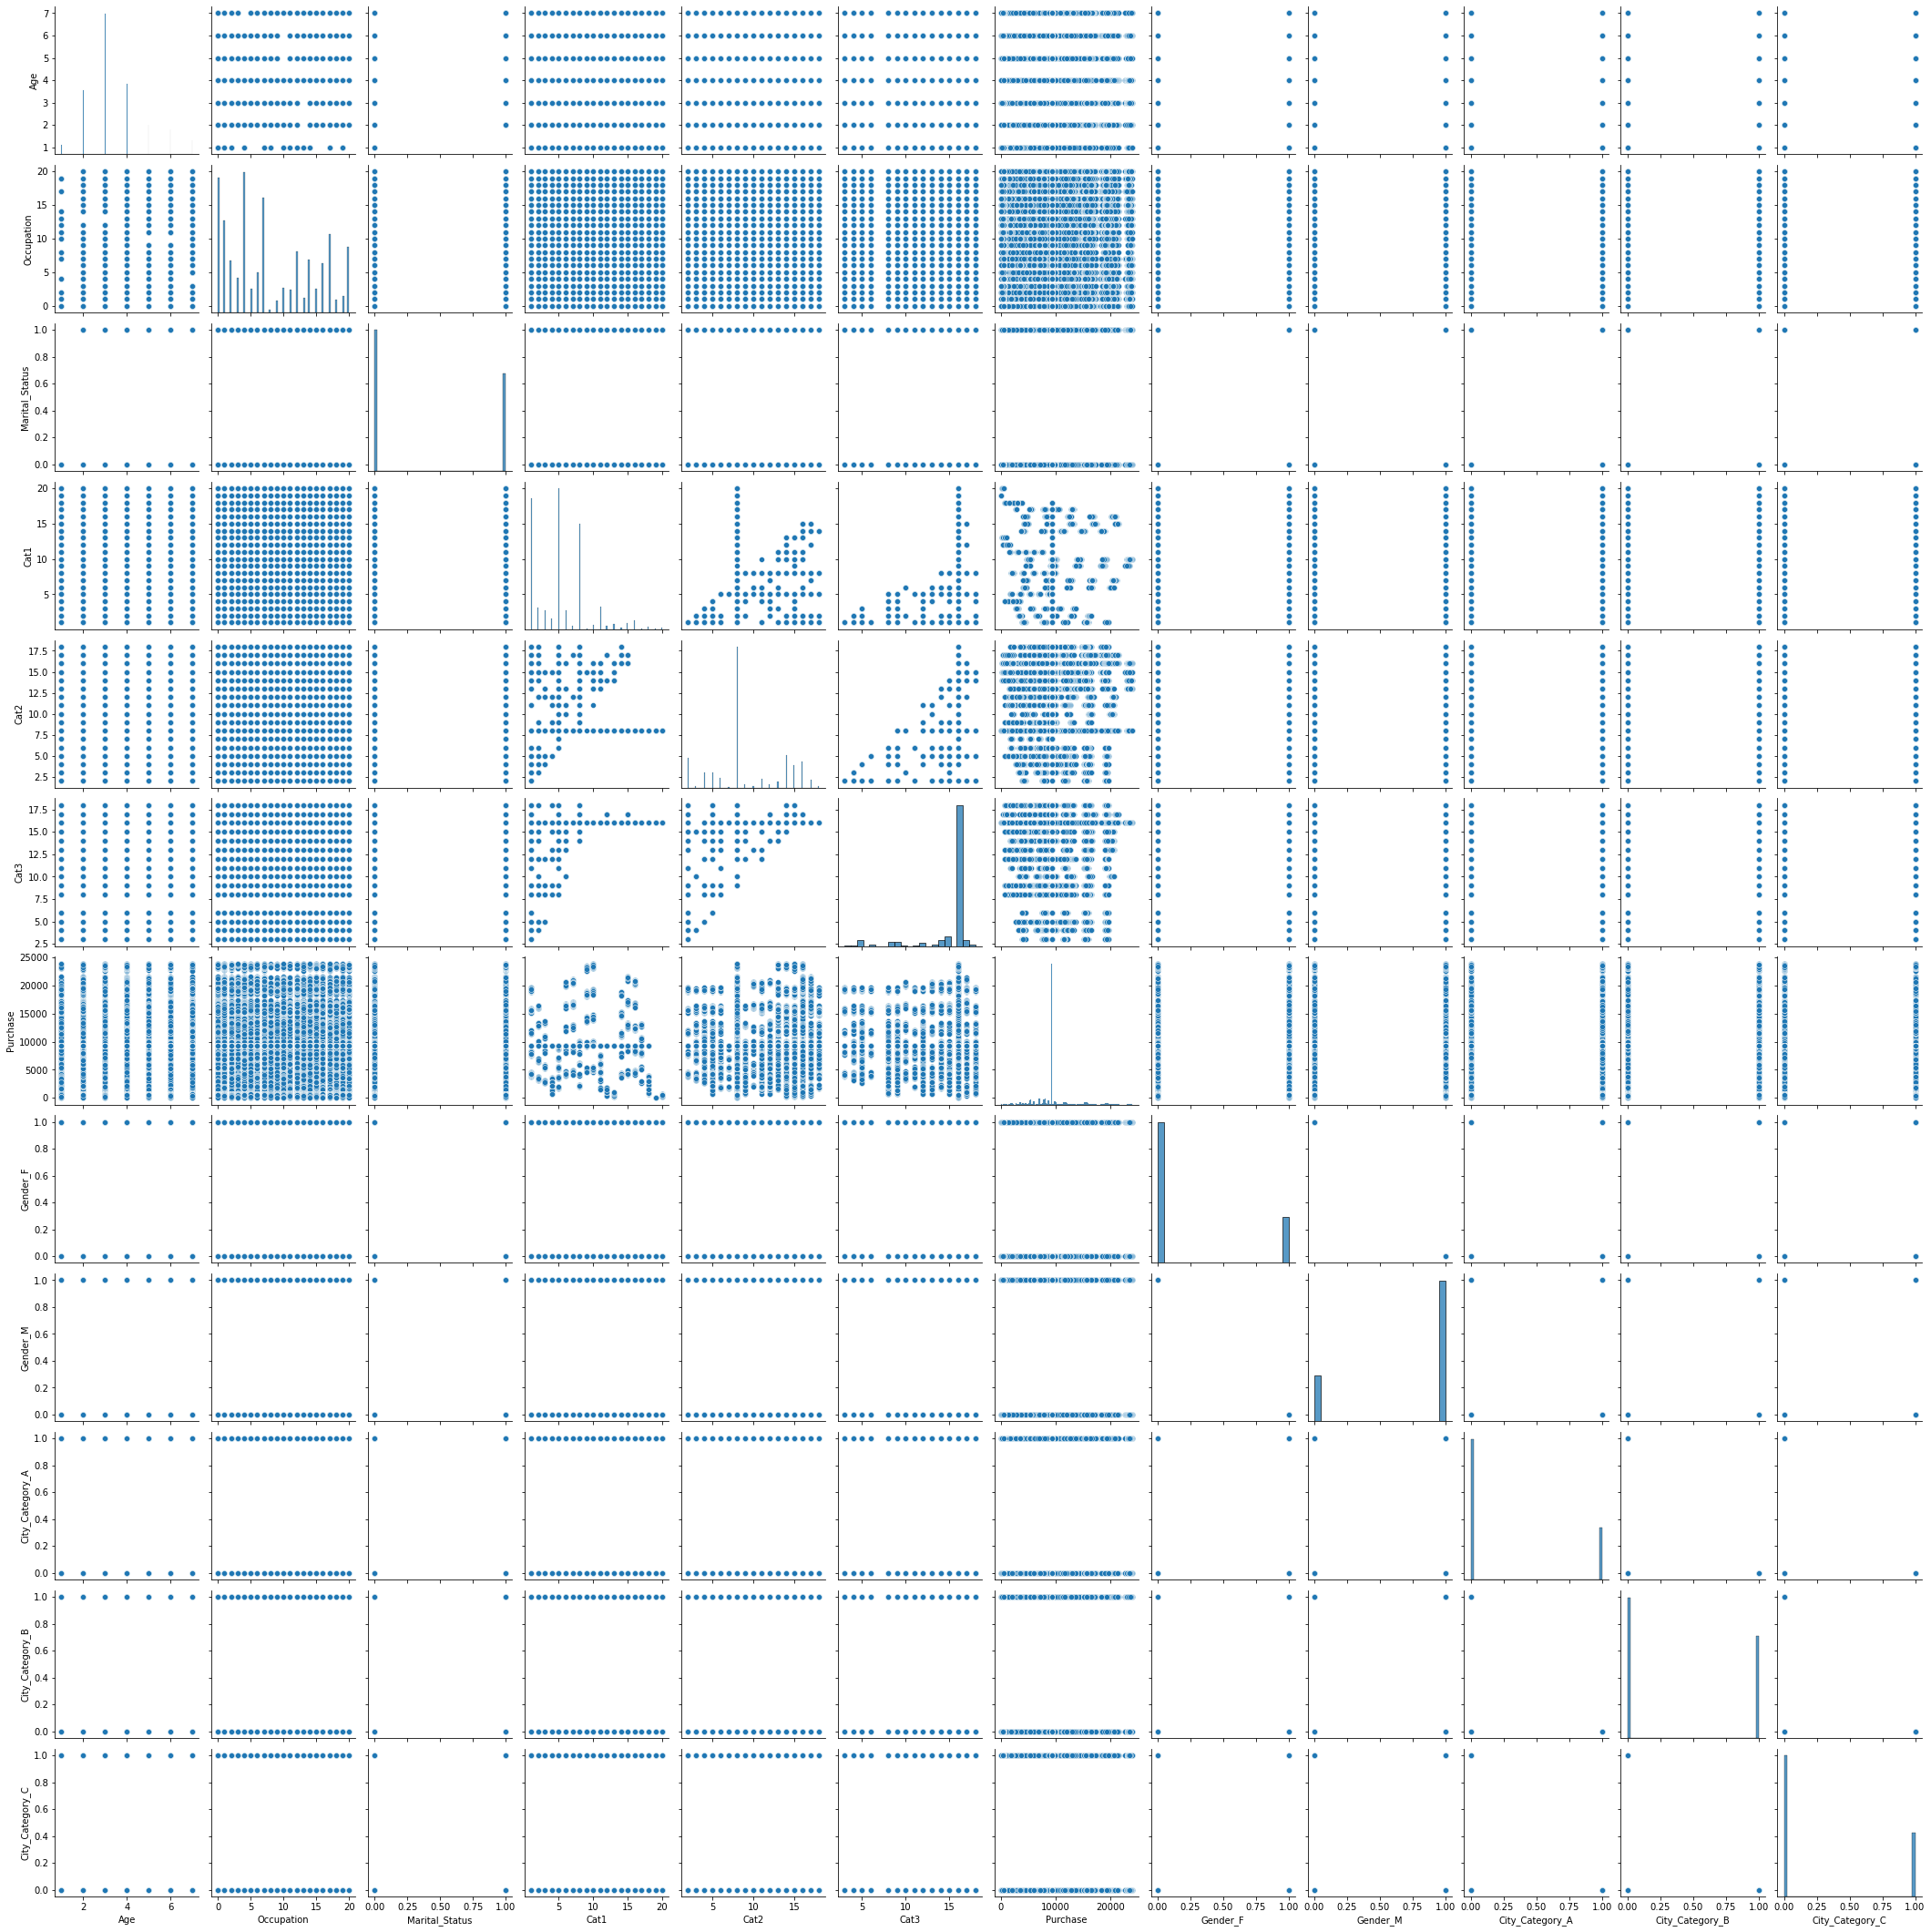

In [268]:
sns.pairplot(df)

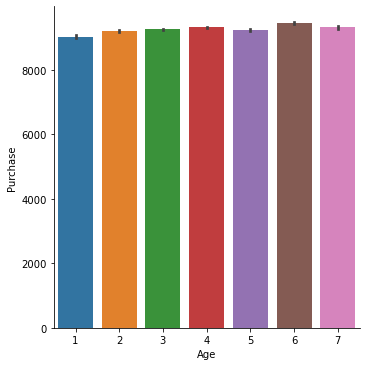

In [329]:
#Visualizing Age vs Plot
sns.catplot(kind= 'bar', x='Age', y='Purchase', data=df)

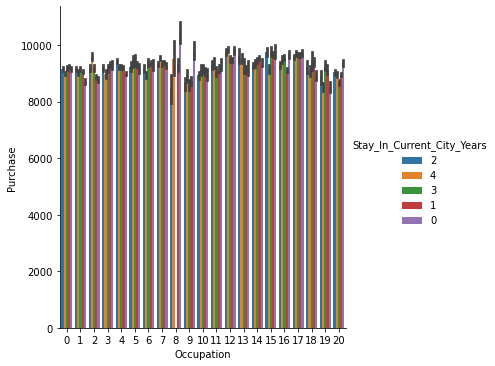

In [330]:
#Occupation VS Purchased

sns.catplot(kind='bar', x='Occupation',y='Purchase', data=df, hue="Stay_In_Current_City_Years")

In [341]:
df= df.drop('Product_ID', axis=1)
df.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Cat1,Cat2,Cat3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1,10,2,0,3,8.0,16.0,8370.0,1,0,1,0,0
1,1,10,2,0,1,6.0,14.0,15200.0,1,0,1,0,0
2,1,10,2,0,12,8.0,16.0,1422.0,1,0,1,0,0
3,1,10,2,0,12,14.0,16.0,1057.0,1,0,1,0,0
4,7,16,4,0,8,8.0,16.0,7969.0,0,1,0,0,1


In [342]:
X= df.drop('Purchase', axis=1)
y= df['Purchase']

print(X.shape)
print(y.shape)

(783667, 12)
(783667,)


In [343]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 12)
(587750,)
(195917, 12)
(195917,)


In [344]:
import sklearn

In [345]:
#Feature scaling is  to transform all data in the dataset in order to be in the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)